In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Year: The year the series was played

Team: The name of the team.

Win: 1 = Win. 0 = Loss

Home: 1 = Home team. 0 = Away team.

Game: Game #

MP - Total minutes played. Equals 240 (48x5=240) if game did not go to overtime. MP>240 if game went to overtime.

FG - Field goals made

FGA - Field goal attempts

FGP - Field Goal Percentage

TP - 3 Point Field Goals Made

TPA - Three point attempts

TPP - three point percentage

FT - Free throws made

FTA - Free throws attempted

FTP - Free throw percentage

ORB - Offensive rebounds

DRB - Defensive rebounds

TRB - Total rebounds

AST - Assists

STL - Steals

BLK - Blocks

TOV - Turnovers

PF - Personal fouls

PTS - points scored

In [2]:
df=pd.read_csv("championsdata.csv")
df

,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Lakers,1,1,1,240,48,89,0.539,0,...,0.867,12,31,43,30,5,9,17,24,109
1,1980,Lakers,2,0,1,240,48,95,0.505,0,...,0.667,15,37,52,32,12,7,26,27,104
2,1980,Lakers,3,1,0,240,44,92,0.478,0,...,0.767,22,34,56,20,5,5,20,25,111
3,1980,Lakers,4,0,0,240,44,93,0.473,0,...,0.737,18,31,49,23,12,6,19,22,102
4,1980,Lakers,5,1,1,240,41,91,0.451,0,...,0.788,19,37,56,28,7,6,21,27,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2017,Warriors,5,1,1,240,46,90,0.511,14,...,0.821,13,29,42,27,8,2,13,24,129
216,2018,Warriors,1,1,1,265,46,90,0.511,13,...,0.950,4,34,38,31,10,6,7,18,124
217,2018,Warriors,2,1,1,240,47,82,0.573,15,...,0.619,7,34,41,28,3,8,12,25,122
218,2018,Warriors,3,1,0,240,42,81,0.519,9,...,0.895,6,31,37,27,6,5,10,20,110


In [3]:
df.info()#The info method prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    220 non-null    int64  
 1   Team    220 non-null    object 
 2   Game    220 non-null    int64  
 3   Win     220 non-null    int64  
 4   Home    220 non-null    int64  
 5   MP      220 non-null    int64  
 6   FG      220 non-null    int64  
 7   FGA     220 non-null    int64  
 8   FGP     220 non-null    float64
 9   TP      220 non-null    int64  
 10  TPA     220 non-null    int64  
 11  TPP     214 non-null    float64
 12  FT      220 non-null    int64  
 13  FTA     220 non-null    int64  
 14  FTP     220 non-null    float64
 15  ORB     220 non-null    int64  
 16  DRB     220 non-null    int64  
 17  TRB     220 non-null    int64  
 18  AST     220 non-null    int64  
 19  STL     220 non-null    int64  
 20  BLK     220 non-null    int64  
 21  TOV     220 non-null    int64  
 22  PF

In [4]:
df.describe()#Data Description works only on numeric data

,Year,Game,Win,Home,MP,FG,FGA,FGP,TP,TPA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1998.863636,3.400000,0.709091,0.504545,242.386364,37.750000,80.877273,0.466523,5.354545,14.604545,...,0.735568,12.295455,30.200000,42.495455,22.504545,7.854545,5.322727,13.709091,22.859091,100.786364
std,11.310865,1.734422,0.455217,0.501120,8.445949,6.323563,9.511753,0.054264,4.035428,9.420321,...,0.105555,4.630549,4.872437,6.459214,6.132850,2.944964,2.769770,3.872029,4.371259,13.314763
min,1980.000000,1.000000,0.000000,0.000000,240.000000,25.000000,62.000000,0.289000,0.000000,0.000000,...,0.368000,3.000000,16.000000,22.000000,11.000000,1.000000,0.000000,4.000000,12.000000,71.000000
25%,1989.000000,2.000000,0.000000,0.000000,240.000000,33.000000,75.000000,0.429750,2.000000,6.750000,...,0.667000,9.000000,27.000000,38.000000,18.000000,6.000000,3.000000,11.000000,20.000000,90.750000
50%,1999.000000,3.000000,1.000000,1.000000,240.000000,37.000000,80.000000,0.467000,5.000000,15.000000,...,0.740000,12.000000,30.000000,42.000000,22.000000,8.000000,5.000000,14.000000,23.000000,101.000000
75%,2009.000000,5.000000,1.000000,1.000000,240.000000,42.000000,87.000000,0.500000,8.000000,20.000000,...,0.815750,15.000000,33.250000,47.000000,27.000000,10.000000,7.000000,16.000000,26.000000,109.000000
max,2018.000000,7.000000,1.000000,1.000000,315.000000,56.000000,130.000000,0.617000,18.000000,43.000000,...,1.000000,27.000000,44.000000,59.000000,44.000000,18.000000,14.000000,26.000000,33.000000,141.000000


In [5]:
df.head()#The head() function is used to get the first 5 rows

,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Lakers,1,1,1,240,48,89,0.539,0,...,0.867,12,31,43,30,5,9,17,24,109
1,1980,Lakers,2,0,1,240,48,95,0.505,0,...,0.667,15,37,52,32,12,7,26,27,104
2,1980,Lakers,3,1,0,240,44,92,0.478,0,...,0.767,22,34,56,20,5,5,20,25,111
3,1980,Lakers,4,0,0,240,44,93,0.473,0,...,0.737,18,31,49,23,12,6,19,22,102
4,1980,Lakers,5,1,1,240,41,91,0.451,0,...,0.788,19,37,56,28,7,6,21,27,108


In [6]:
df.tail()#The tail() function is used to get the last 5 rows


,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
215,2017,Warriors,5,1,1,240,46,90,0.511,14,...,0.821,13,29,42,27,8,2,13,24,129
216,2018,Warriors,1,1,1,265,46,90,0.511,13,...,0.950,4,34,38,31,10,6,7,18,124
217,2018,Warriors,2,1,1,240,47,82,0.573,15,...,0.619,7,34,41,28,3,8,12,25,122
218,2018,Warriors,3,1,0,240,42,81,0.519,9,...,0.895,6,31,37,27,6,5,10,20,110
219,2018,Warriors,4,1,0,240,39,86,0.453,14,...,1.000,10,34,44,25,7,13,8,24,108


In [7]:
df.isnull().sum()#check is there any null value 

Year    0
Team    0
Game    0
Win     0
Home    0
MP      0
FG      0
FGA     0
FGP     0
TP      0
TPA     0
TPP     6
FT      0
FTA     0
FTP     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
dtype: int64

In [8]:
df.dtypes# return the dtype of each column

Year      int64
Team     object
Game      int64
Win       int64
Home      int64
MP        int64
FG        int64
FGA       int64
FGP     float64
TP        int64
TPA       int64
TPP     float64
FT        int64
FTA       int64
FTP     float64
ORB       int64
DRB       int64
TRB       int64
AST       int64
STL       int64
BLK       int64
TOV       int64
PF        int64
PTS       int64
dtype: object

In [9]:
df.select_dtypes(include='float64')

,FGP,TPP,FTP
0,0.539,NaN,0.867
1,0.505,0.000,0.667
2,0.478,0.000,0.767
3,0.473,NaN,0.737
4,0.451,NaN,0.788
...,...,...,...
215,0.511,0.368,0.821
216,0.511,0.361,0.950
217,0.573,0.417,0.619
218,0.519,0.346,0.895


In [10]:
df.nunique()

Year     39
Team     13
Game      7
Win       2
Home      2
MP        3
FG       29
FGA      43
FGP     128
TP       18
TPA      38
TPP      80
FT       32
FTA      42
FTP     127
ORB      25
DRB      27
TRB      31
AST      28
STL      16
BLK      15
TOV      21
PF       22
PTS      58
dtype: int64

In [11]:
df.nlargest(15,'Win')#nlargest in this we have to specify number of rows we have to fetch and column name


,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Lakers,1,1,1,240,48,89,0.539,0,...,0.867,12,31,43,30,5,9,17,24,109
2,1980,Lakers,3,1,0,240,44,92,0.478,0,...,0.767,22,34,56,20,5,5,20,25,111
4,1980,Lakers,5,1,1,240,41,91,0.451,0,...,0.788,19,37,56,28,7,6,21,27,108
5,1980,Lakers,6,1,0,240,45,92,0.489,0,...,0.943,17,35,52,27,14,4,17,22,123
6,1981,Celtics,1,1,1,240,41,95,0.432,0,...,0.800,25,29,54,23,6,5,19,21,98
8,1981,Celtics,3,1,0,240,40,89,0.449,2,...,0.632,16,28,44,24,12,6,11,25,94
10,1981,Celtics,5,1,1,240,41,94,0.436,0,...,0.771,19,35,54,25,5,8,14,23,109
11,1981,Celtics,6,1,0,240,43,78,0.551,1,...,0.833,9,28,37,26,6,0,13,21,102
12,1982,Lakers,1,1,0,240,49,93,0.527,0,...,0.743,19,31,50,34,11,7,22,26,124
14,1982,Lakers,3,1,1,240,50,91,0.549,1,...,0.596,17,31,48,30,15,5,18,30,129


In [12]:
df.nsmallest(5,'Home')

,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2,1980,Lakers,3,1,0,240,44,92,0.478,0,...,0.767,22,34,56,20,5,5,20,25,111
3,1980,Lakers,4,0,0,240,44,93,0.473,0,...,0.737,18,31,49,23,12,6,19,22,102
5,1980,Lakers,6,1,0,240,45,92,0.489,0,...,0.943,17,35,52,27,14,4,17,22,123
8,1981,Celtics,3,1,0,240,40,89,0.449,2,...,0.632,16,28,44,24,12,6,11,25,94
9,1981,Celtics,4,0,0,240,35,74,0.473,0,...,0.667,17,30,47,22,5,6,22,22,86


In [13]:
win=df['Win'].sum()#Total wins
win

156

In [14]:
GM=df['Game'].sum()#Total Games Played 
GM

748

In [15]:
Freethrowpercentage=df['FTP'].sum()
Freethrowpercentage

161.825

In [16]:
df[df.Year>2000]#From the year 2001


,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
120,2001,Lakers,1,0,1,265,40,90,0.444,6,...,0.556,16,28,44,23,14,9,19,22,101
121,2001,Lakers,2,1,1,240,38,81,0.469,4,...,0.692,15,37,52,29,7,13,16,24,98
122,2001,Lakers,3,1,0,240,35,75,0.467,4,...,0.880,10,30,40,18,8,6,13,26,96
123,2001,Lakers,4,1,0,240,36,72,0.500,10,...,0.563,12,31,43,24,6,6,14,22,100
124,2001,Lakers,5,1,0,240,32,71,0.451,12,...,0.711,14,33,47,21,6,10,12,22,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2017,Warriors,5,1,1,240,46,90,0.511,14,...,0.821,13,29,42,27,8,2,13,24,129
216,2018,Warriors,1,1,1,265,46,90,0.511,13,...,0.950,4,34,38,31,10,6,7,18,124
217,2018,Warriors,2,1,1,240,47,82,0.573,15,...,0.619,7,34,41,28,3,8,12,25,122
218,2018,Warriors,3,1,0,240,42,81,0.519,9,...,0.895,6,31,37,27,6,5,10,20,110


In [17]:
df.Team=='Lakers'

0       True
1       True
2       True
3       True
4       True
       ...  
215    False
216    False
217    False
218    False
219    False
Name: Team, Length: 220, dtype: bool

In [18]:
df[df.Team=="Lakers"]

,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Lakers,1,1,1,240,48,89,0.539,0,...,0.867,12,31,43,30,5,9,17,24,109
1,1980,Lakers,2,0,1,240,48,95,0.505,0,...,0.667,15,37,52,32,12,7,26,27,104
2,1980,Lakers,3,1,0,240,44,92,0.478,0,...,0.767,22,34,56,20,5,5,20,25,111
3,1980,Lakers,4,0,0,240,44,93,0.473,0,...,0.737,18,31,49,23,12,6,19,22,102
4,1980,Lakers,5,1,1,240,41,91,0.451,0,...,0.788,19,37,56,28,7,6,21,27,108
5,1980,Lakers,6,1,0,240,45,92,0.489,0,...,0.943,17,35,52,27,14,4,17,22,123
12,1982,Lakers,1,1,0,240,49,93,0.527,0,...,0.743,19,31,50,34,11,7,22,26,124
13,1982,Lakers,2,0,0,240,35,83,0.422,0,...,0.649,17,22,39,25,11,6,18,21,94
14,1982,Lakers,3,1,1,240,50,91,0.549,1,...,0.596,17,31,48,30,15,5,18,30,129
15,1982,Lakers,4,1,1,240,45,97,0.464,0,...,0.724,16,33,49,35,10,4,12,21,111


In [19]:
df[df.Year>2015]


,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
204,2016,Cavaliers,1,0,0,240,32,84,0.381,7,...,0.900,15,32,47,17,7,4,15,17,89
205,2016,Cavaliers,2,0,0,240,28,79,0.354,5,...,0.667,9,25,34,15,15,3,17,19,77
206,2016,Cavaliers,3,1,1,240,48,91,0.527,12,...,0.706,17,35,52,23,8,3,13,25,120
207,2016,Cavaliers,4,0,1,240,38,81,0.469,6,...,0.577,16,24,40,15,5,6,11,24,97
208,2016,Cavaliers,5,1,0,240,44,83,0.530,10,...,0.609,8,33,41,15,11,9,16,22,112
209,2016,Cavaliers,6,1,1,240,40,77,0.519,10,...,0.781,8,37,45,24,12,7,10,25,115
210,2016,Cavaliers,7,1,0,240,33,82,0.402,6,...,0.840,9,39,48,17,7,6,11,15,93
211,2017,Warriors,1,1,1,240,45,106,0.425,12,...,0.688,14,36,50,31,12,3,4,24,113
212,2017,Warriors,2,1,1,240,46,89,0.517,18,...,0.917,10,43,53,34,5,7,20,19,132
213,2017,Warriors,3,1,0,240,40,83,0.482,16,...,0.917,8,36,44,29,8,4,18,28,118


In [20]:
df.loc[(df['Team']=='Warriors')]

,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
198,2015,Warriors,1,1,1,265,39,88,0.443,10,...,0.909,11,37,48,24,8,5,12,16,108
199,2015,Warriors,2,0,1,265,33,83,0.398,8,...,0.760,10,35,45,16,11,7,18,31,93
200,2015,Warriors,3,0,0,240,36,90,0.400,12,...,0.583,18,28,46,21,6,7,14,25,91
201,2015,Warriors,4,1,0,240,36,77,0.468,12,...,0.704,6,38,44,24,5,5,7,21,103
202,2015,Warriors,5,1,1,240,36,75,0.480,12,...,0.588,11,32,43,25,7,2,16,25,104
203,2015,Warriors,6,1,0,240,37,85,0.435,13,...,0.621,7,32,39,28,11,4,9,27,105
211,2017,Warriors,1,1,1,240,45,106,0.425,12,...,0.688,14,36,50,31,12,3,4,24,113
212,2017,Warriors,2,1,1,240,46,89,0.517,18,...,0.917,10,43,53,34,5,7,20,19,132
213,2017,Warriors,3,1,0,240,40,83,0.482,16,...,0.917,8,36,44,29,8,4,18,28,118
215,2017,Warriors,5,1,1,240,46,90,0.511,14,...,0.821,13,29,42,27,8,2,13,24,129


In [21]:
df.loc[(df['Win']>=1)]

,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Lakers,1,1,1,240,48,89,0.539,0,...,0.867,12,31,43,30,5,9,17,24,109
2,1980,Lakers,3,1,0,240,44,92,0.478,0,...,0.767,22,34,56,20,5,5,20,25,111
4,1980,Lakers,5,1,1,240,41,91,0.451,0,...,0.788,19,37,56,28,7,6,21,27,108
5,1980,Lakers,6,1,0,240,45,92,0.489,0,...,0.943,17,35,52,27,14,4,17,22,123
6,1981,Celtics,1,1,1,240,41,95,0.432,0,...,0.800,25,29,54,23,6,5,19,21,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2017,Warriors,5,1,1,240,46,90,0.511,14,...,0.821,13,29,42,27,8,2,13,24,129
216,2018,Warriors,1,1,1,265,46,90,0.511,13,...,0.950,4,34,38,31,10,6,7,18,124
217,2018,Warriors,2,1,1,240,47,82,0.573,15,...,0.619,7,34,41,28,3,8,12,25,122
218,2018,Warriors,3,1,0,240,42,81,0.519,9,...,0.895,6,31,37,27,6,5,10,20,110


In [22]:
df.loc[200:,['Team','Win']]

,Team,Win
200,Warriors,0
201,Warriors,1
202,Warriors,1
203,Warriors,1
204,Cavaliers,0
205,Cavaliers,0
206,Cavaliers,1
207,Cavaliers,0
208,Cavaliers,1
209,Cavaliers,1


In [23]:
df.loc[(df['PTS']>120)]


,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5,1980,Lakers,6,1,0,240,45,92,0.489,0,...,0.943,17,35,52,27,14,4,17,22,123
12,1982,Lakers,1,1,0,240,49,93,0.527,0,...,0.743,19,31,50,34,11,7,22,26,124
14,1982,Lakers,3,1,1,240,50,91,0.549,1,...,0.596,17,31,48,30,15,5,18,30,129
23,1984,Celtics,2,0,1,265,45,98,0.459,0,...,0.708,20,30,50,20,13,4,17,27,124
25,1984,Celtics,4,1,0,265,48,111,0.432,2,...,0.838,27,25,52,30,15,3,14,28,129
26,1984,Celtics,5,1,1,240,45,87,0.517,3,...,0.778,13,38,51,28,8,5,18,32,121
31,1985,Lakers,3,1,1,240,52,96,0.542,4,...,0.778,13,36,49,34,12,6,12,28,136
41,1987,Lakers,1,1,1,240,55,99,0.556,1,...,0.789,17,30,47,32,10,6,13,24,126
42,1987,Lakers,2,1,1,240,56,91,0.615,6,...,0.719,7,26,33,44,8,8,10,25,141
60,1990,Pistons,3,1,0,240,43,81,0.531,3,...,0.780,10,26,36,19,3,4,14,26,121


In [24]:
df.loc[190:217:5,['Team','Win','PTS']]

,Team,Win,PTS
190,Heat,0,104
195,Spurs,1,111
200,Warriors,0,91
205,Cavaliers,0,77
210,Cavaliers,1,93
215,Warriors,1,129


In [25]:
df[['Year','Team','Win','PTS']]

,Year,Team,Win,PTS
0,1980,Lakers,1,109
1,1980,Lakers,0,104
2,1980,Lakers,1,111
3,1980,Lakers,0,102
4,1980,Lakers,1,108
...,...,...,...,...
215,2017,Warriors,1,129
216,2018,Warriors,1,124
217,2018,Warriors,1,122
218,2018,Warriors,1,110


In [26]:
df.iloc[168:]

,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
168,2010,Lakers,1,1,1,240,37,76,0.487,4,...,0.774,12,30,42,18,6,7,12,26,102
169,2010,Lakers,2,0,1,240,29,71,0.408,5,...,0.756,10,29,39,18,8,14,15,29,94
170,2010,Lakers,3,1,0,240,34,76,0.447,2,...,0.875,11,32,43,13,2,7,8,20,91
171,2010,Lakers,4,0,0,240,32,71,0.451,7,...,0.818,8,26,34,13,6,3,15,23,89
172,2010,Lakers,5,0,0,240,31,78,0.397,7,...,0.654,16,18,34,12,9,1,13,22,86
173,2010,Lakers,6,1,1,240,33,79,0.418,6,...,0.895,12,40,52,17,13,8,13,17,89
174,2010,Lakers,7,1,1,240,27,83,0.325,4,...,0.676,23,30,53,11,7,3,11,19,83
175,2011,Mavericks,1,0,0,240,25,67,0.373,9,...,0.781,6,30,36,18,6,8,11,22,84
176,2011,Mavericks,2,1,0,240,36,75,0.480,6,...,0.810,11,30,41,18,8,2,18,20,95
177,2011,Mavericks,3,0,1,240,28,70,0.400,8,...,0.815,12,30,42,18,3,8,14,14,86


In [27]:
df1=df[['Year','Team','Win','PTS']].iloc[168:]
df1

,Year,Team,Win,PTS
168,2010,Lakers,1,102
169,2010,Lakers,0,94
170,2010,Lakers,1,91
171,2010,Lakers,0,89
172,2010,Lakers,0,86
173,2010,Lakers,1,89
174,2010,Lakers,1,83
175,2011,Mavericks,0,84
176,2011,Mavericks,1,95
177,2011,Mavericks,0,86


In [28]:
#shape attribute gives the actual count of rows and columns present in DataFrame
df.shape

(220, 24)

In [29]:
#columns attribute gives the all names of columns present in DataFrame
df.columns


Index(['Year', 'Team', 'Game', 'Win', 'Home', 'MP', 'FG', 'FGA', 'FGP', 'TP',
       'TPA', 'TPP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

<AxesSubplot:ylabel='Game'>

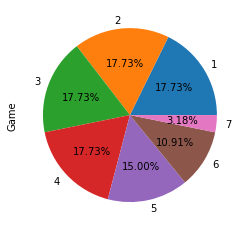

In [30]:
df['Game'].value_counts().plot(kind='pie',autopct="%1.2f%%")

<AxesSubplot:ylabel='Win'>

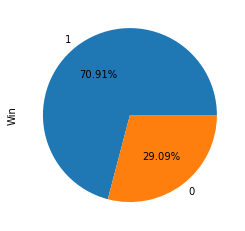

In [31]:
df['Win'].value_counts().plot(kind='pie',autopct="%1.2f%%")

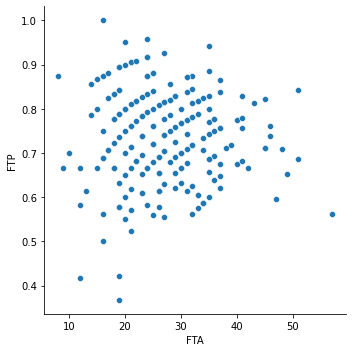

In [32]:
sns.relplot(x='FTA',y='FTP',data=df)#FTA - Free throws attempted and FTP - Free throw percentage

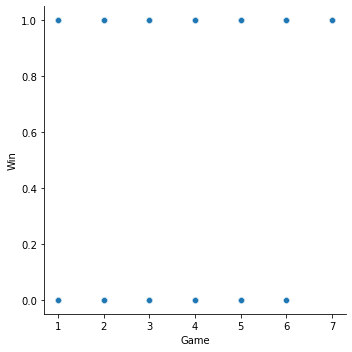

In [33]:
sns.relplot(x='Game',y='Win',data=df)

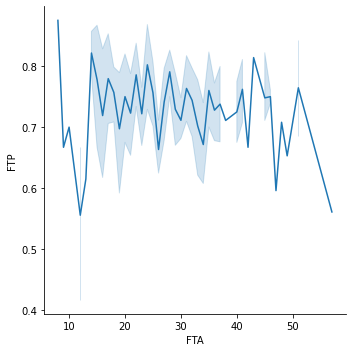

In [34]:
sns.relplot(x='FTA',y='FTP',data=df,kind='line')

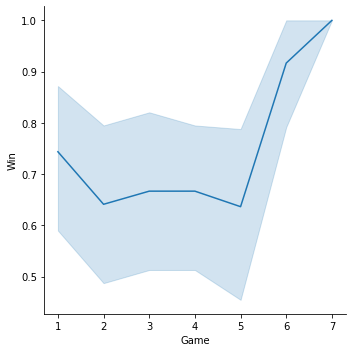

In [35]:
sns.relplot(x='Game',y='Win',data=df,kind='line')

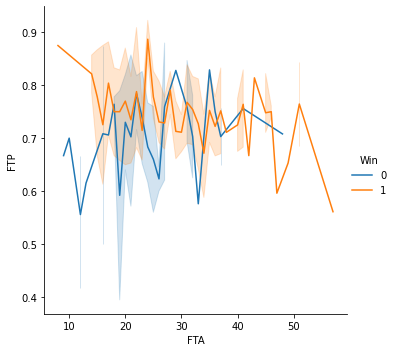

In [36]:
sns.relplot(x='FTA',y='FTP',data=df,kind='line',hue='Win')

<AxesSubplot:xlabel='FTA', ylabel='FTP'>

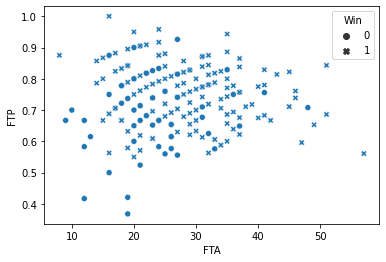

In [37]:
sns.scatterplot(x='FTA',y='FTP',data=df,style='Win')

<AxesSubplot:xlabel='Game', ylabel='Win'>

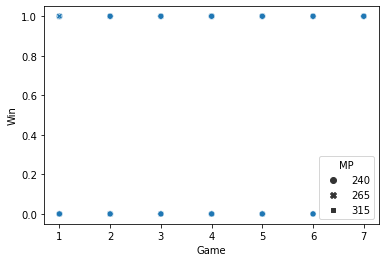

In [38]:
sns.scatterplot(x='Game',y='Win',data=df,style='MP')

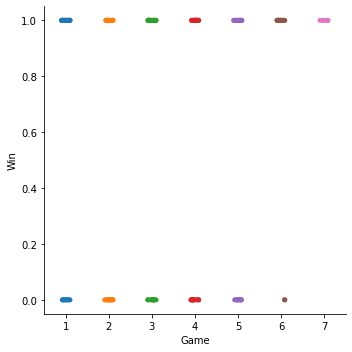

In [39]:
sns.catplot(x='Game',y='Win',data=df)

<AxesSubplot:xlabel='Win', ylabel='TP'>

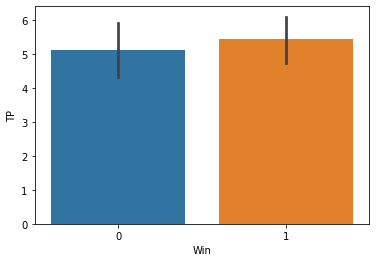

In [40]:
sns.barplot(x='Win',y='TP',data=df)

<AxesSubplot:xlabel='Game', ylabel='Win'>

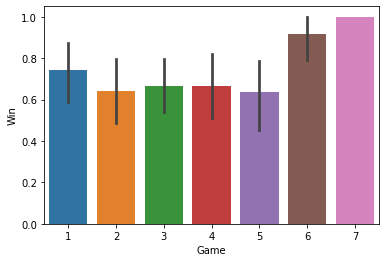

In [41]:
sns.barplot(x='Game',y='Win',data=df)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MP', ylabel='Density'>

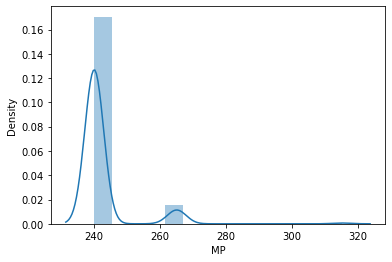

In [42]:
sns.distplot(df['MP'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MP', ylabel='Density'>

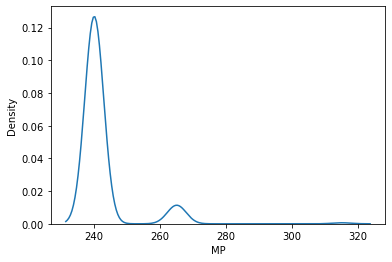

In [43]:
sns.distplot(df['MP'],kde=True,hist=False)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


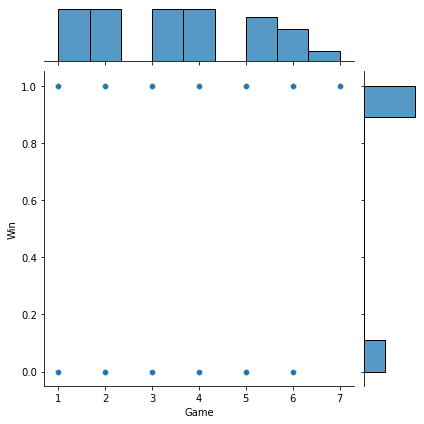

In [44]:
sns.jointplot(df['Game'],df['Win'])

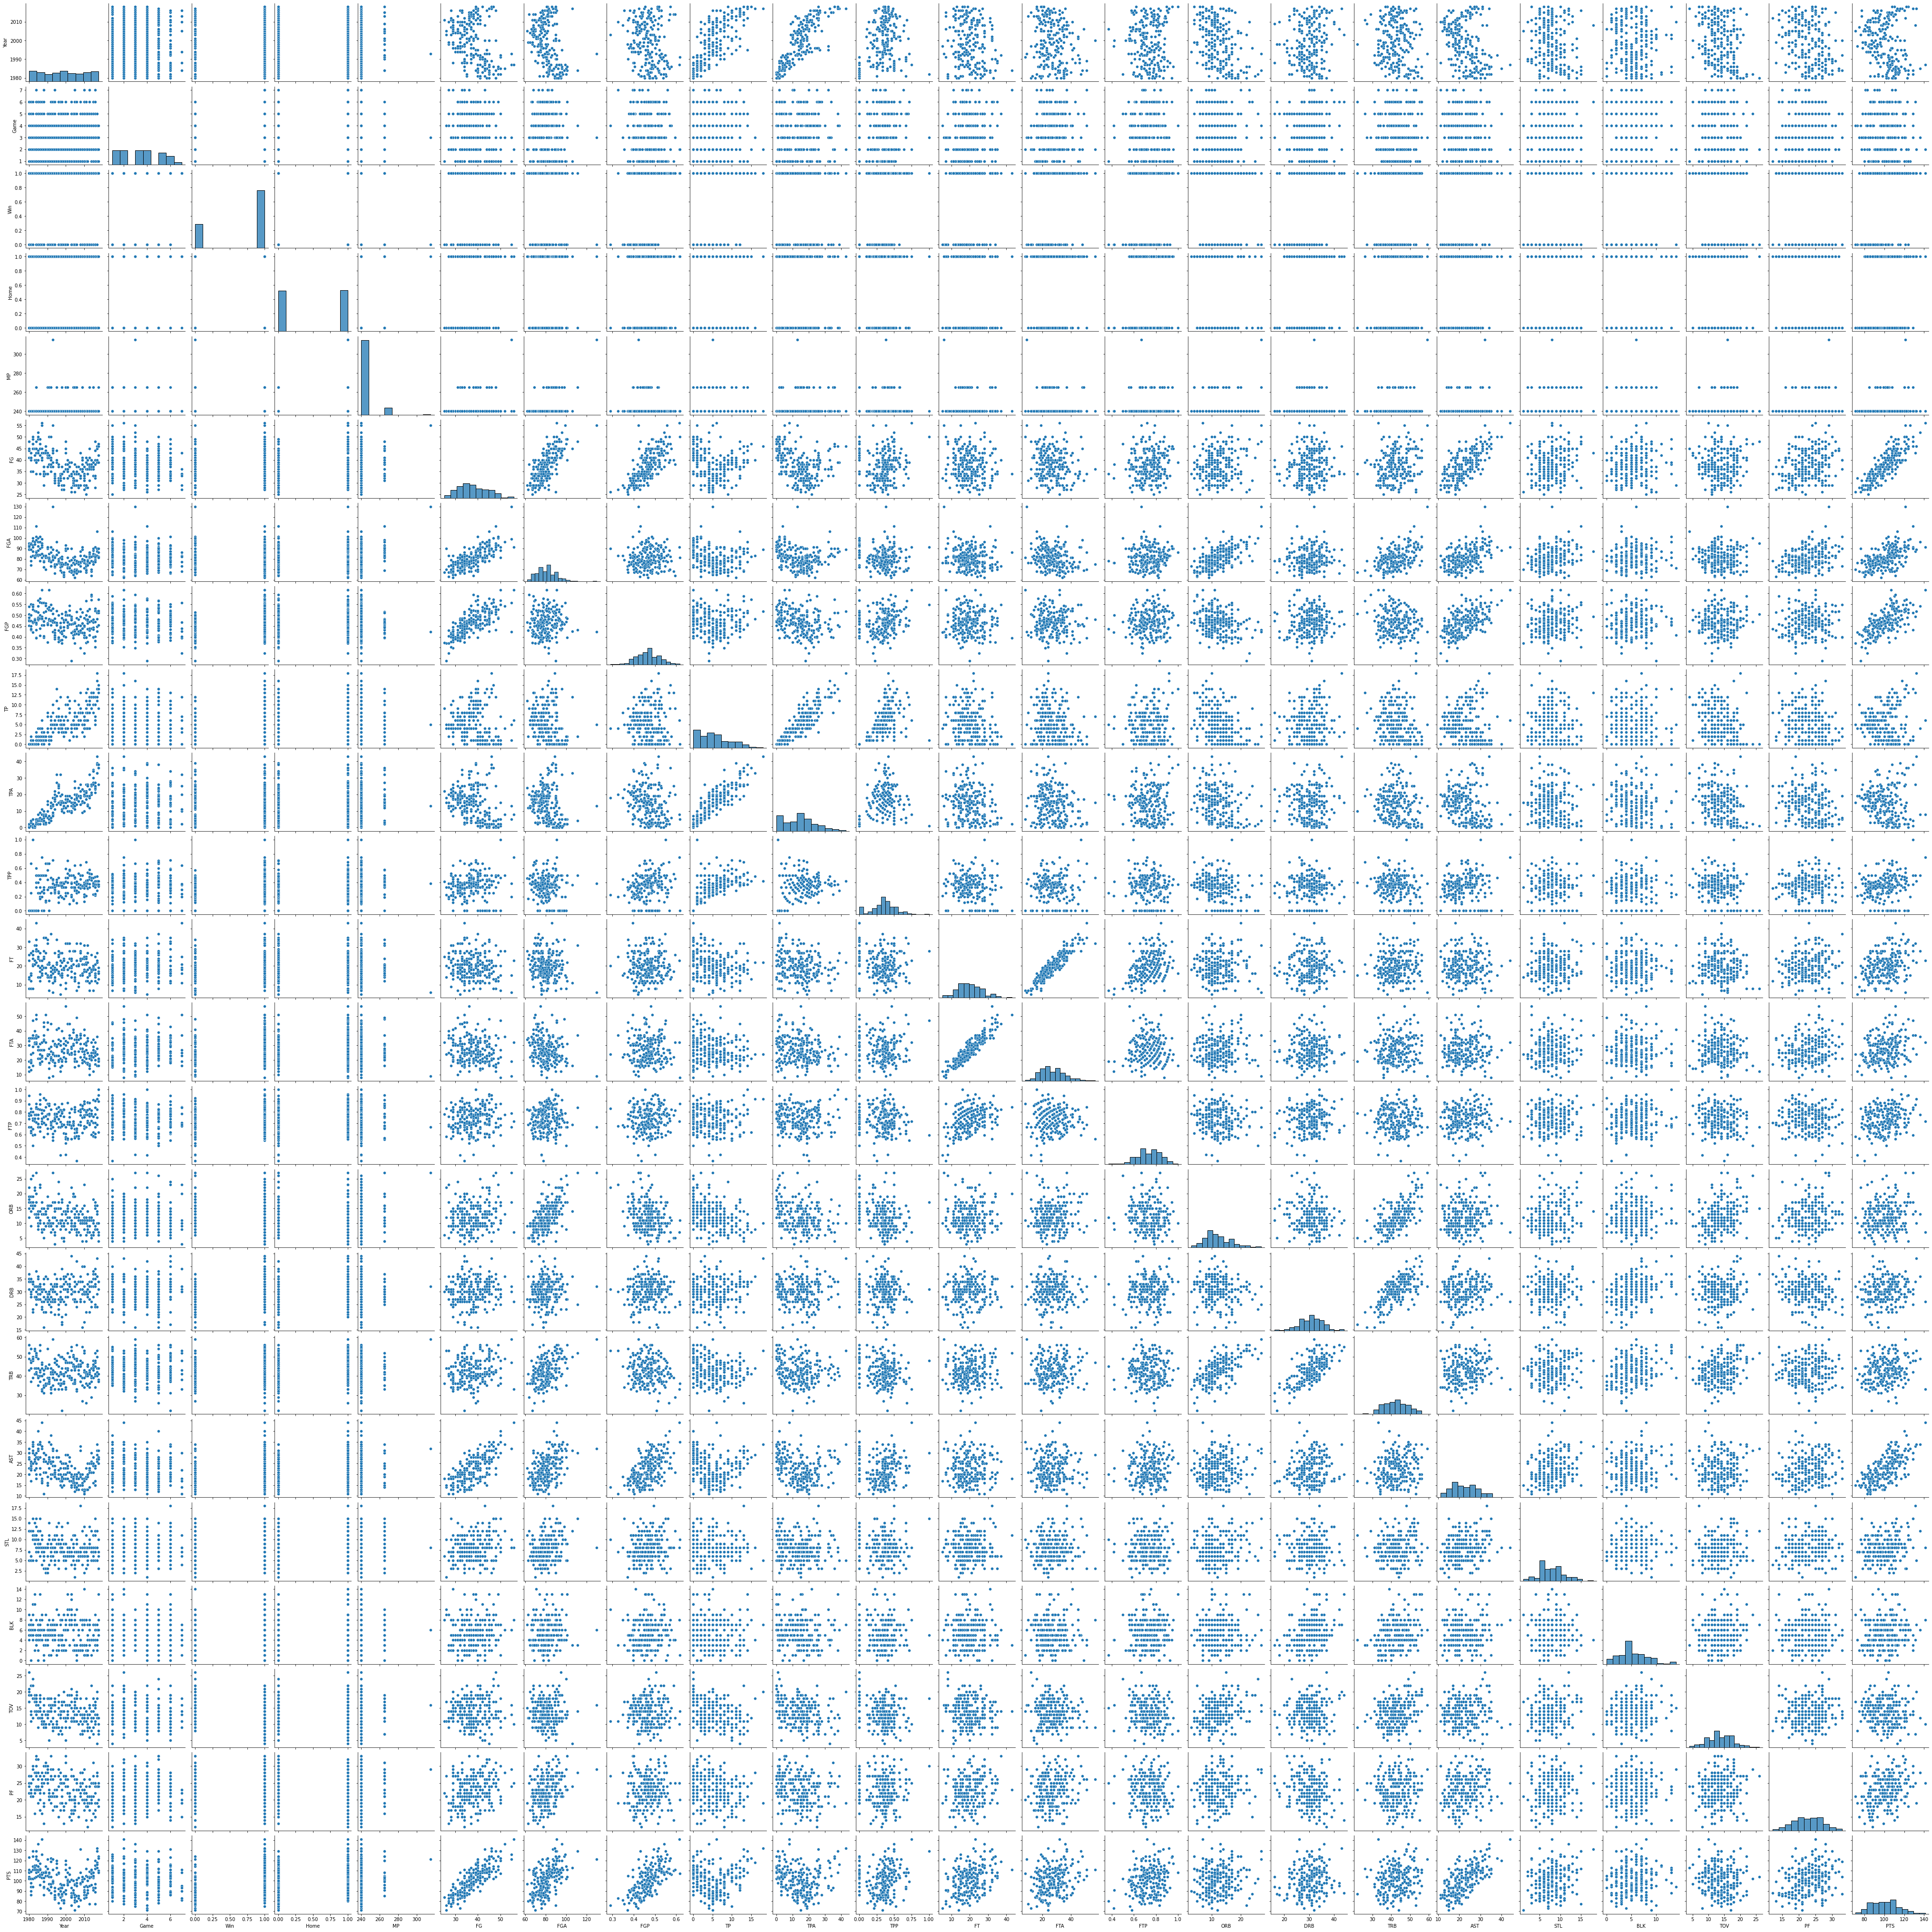

In [45]:
sns.pairplot(df)

<AxesSubplot:xlabel='BLK', ylabel='Win'>

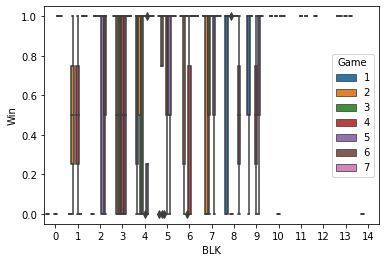

In [46]:
sns.boxplot(x='BLK',y="Win",data=df,hue='Game')

<AxesSubplot:xlabel='Game', ylabel='Win'>

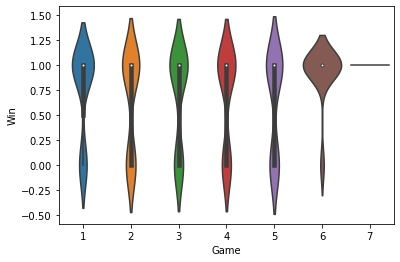

In [47]:
sns.violinplot(x='Game',y='Win',data=df)

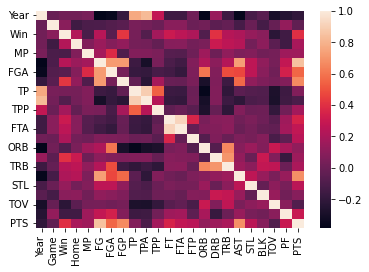

In [58]:
z=df.corr()
sns.heatmap(z)
figsize=(14,10)

<AxesSubplot:>

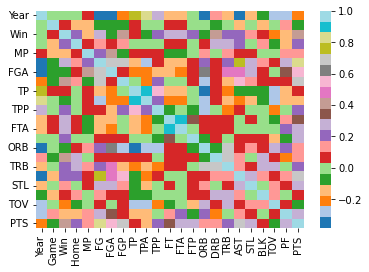

In [49]:
sns.heatmap(df.corr(),cmap='tab20')

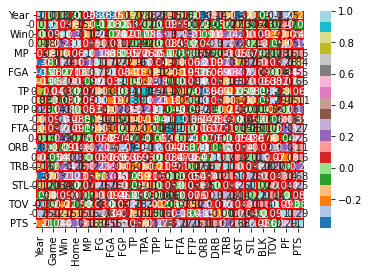

In [56]:
sns.heatmap(df.corr(),cmap='tab20',annot=True,linewidth=2,linecolor='red')
figsize=(30,30)